In [40]:
#import libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#import data file
data = pd.read_csv("cleaned_data.csv")

#drop error index
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("Unnamed: 0.1", axis=1, inplace=True)

#View details of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472179 entries, 0 to 472178
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   object_id    472179 non-null  int64 
 1   line_number  472179 non-null  object
 2   description  472179 non-null  object
 3   value        472179 non-null  int64 
 4   name         472179 non-null  object
dtypes: int64(2), object(3)
memory usage: 18.0+ MB


In [76]:
#create new column for year
data['year'] = ""

#get year of each entry
for i in data['object_id']:
    year = int(str(i)[0:4])
    data.loc[data['object_id'] == i,'year'] = year

data.head(20)

,object_id,line_number,description,value,name,year
0,202000949349300500,Part IX Line 1/2,"Grants and other assistance to governments, or...",290690,Virginia Gay Hospital Health Care,2020
1,202000949349300500,Part IX Line 25; col (A),Total functional expenses,290690,Virginia Gay Hospital Health Care,2020
2,201233199349305998,Part IX Line 5; col (A),"Compensation of current officers, directors, a...",497157,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
3,201233199349305998,Part IX Line 7; col (A),Other salaries and wages,4093138,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
4,201233199349305998,Part IX Line 9; col (A),Other employee benefits,656174,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
5,201233199349305998,Part IX Line 10; col (A),Payroll taxes,415246,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
6,201233199349305998,Part IX Line 11b; col (A),Legal fees,6314,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
7,201233199349305998,Part IX Line 11c; col (A),Accounting fees,46248,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
8,201233199349305998,Part IX Line 11g; col (A),Other fees,71437,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
9,201233199349305998,Part IX Line 12; col (A),Advertising,241934,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012


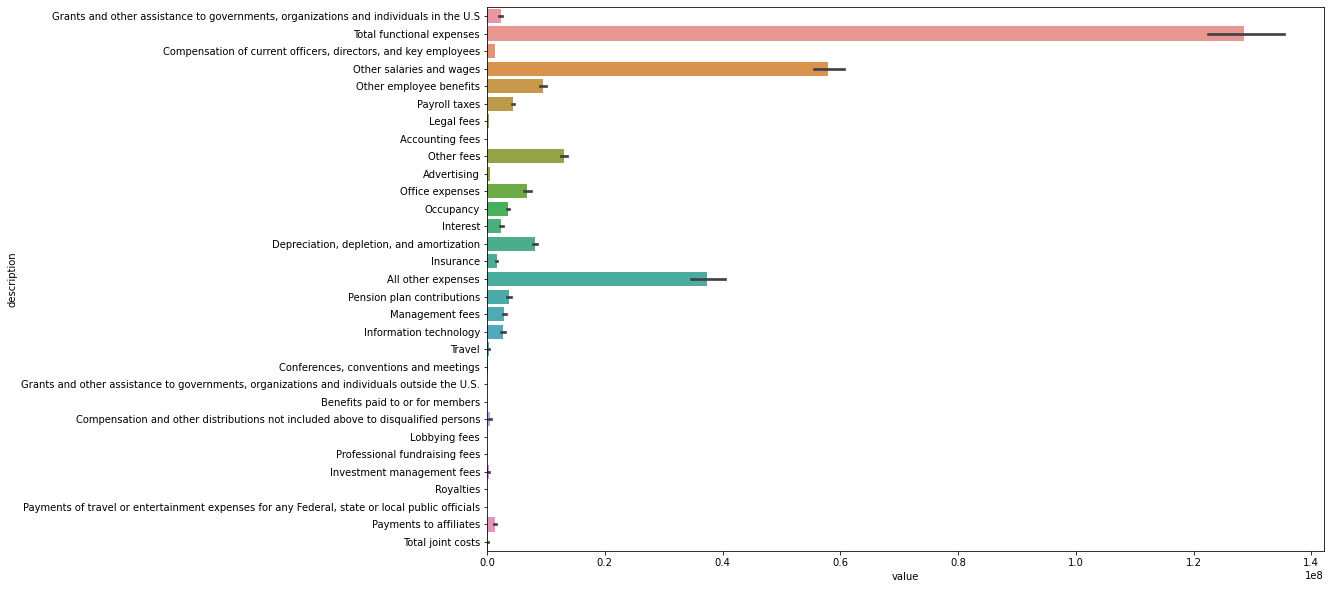

In [80]:
#drop Total functional expenses as it encompases all cost
plt.figure(figsize=(15,10))
sns.barplot(data=data, y='description', x='value')

In [88]:
#get number of unique hospitals 
data['name'].nunique()

5689

In [110]:
#calculate Percentage Cost
for i in data['object_id']:
    data_temp = data[data['object_id']== i]
    total_val = data_temp['value'].where(data_temp['description']=="Total functional expenses").sum()
    val = ((data_temp['value']/total_val)*100).round(2)
    data.loc[data['object_id'] == i,'perc_cost'] = val


In [111]:
#check data
data.head(20)

,object_id,line_number,description,value,perc_cost,name,year
0,2.020009e+17,Part IX Line 1/2,"Grants and other assistance to governments, or...",290690.0,100.0,Virginia Gay Hospital Health Care,2020
1,2.020009e+17,Part IX Line 25; col (A),Total functional expenses,290690.0,100.0,Virginia Gay Hospital Health Care,2020
2,2.012332e+17,Part IX Line 5; col (A),"Compensation of current officers, directors, a...",497157.0,5.91,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
3,2.012332e+17,Part IX Line 7; col (A),Other salaries and wages,4093138.0,48.7,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
4,2.012332e+17,Part IX Line 9; col (A),Other employee benefits,656174.0,7.81,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
5,2.012332e+17,Part IX Line 10; col (A),Payroll taxes,415246.0,4.94,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
6,2.012332e+17,Part IX Line 11b; col (A),Legal fees,6314.0,0.08,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
7,2.012332e+17,Part IX Line 11c; col (A),Accounting fees,46248.0,0.55,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
8,2.012332e+17,Part IX Line 11g; col (A),Other fees,71437.0,0.85,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012
9,2.012332e+17,Part IX Line 12; col (A),Advertising,241934.0,2.88,DOVELEWIS EMERGENCY ANIMAL HOSPITAL,2012


In [112]:
#save data
data.to_csv("final_datafile.csv",index=False)